# Testing HotVis on the office graph

In [1]:
import csv
from HotVisFunctions import *
import pandas as pd

In [2]:
# load graph
office_graph = pp.io.read_csv_temporal_graph('graphs/office/network/edges.csv', is_undirected = True, timestamp_format='%S')
# load metadata
meta_data = pd.read_csv("graphs/office/network/nodes.csv")


Every class gets its own color.

In [3]:
print(meta_data["department"].unique())

['DSE' 'DMCT' 'DISQ' 'SRH' 'SFLE']


In [4]:
colors = {}
color_map = {'DSE': 'yellow', 'DMCT': 'green', 'DISQ': 'blue', 'SRH':'pink', 'SFLE':'black'}
for index, row in meta_data.iterrows():
        colors[f"{row['index']}"] = color_map[row['department']]
style = {}
style['node_color'] = colors
style['node_size'] = 10
style['edge_size'] = 0.1
style['edge_opacity'] = 1


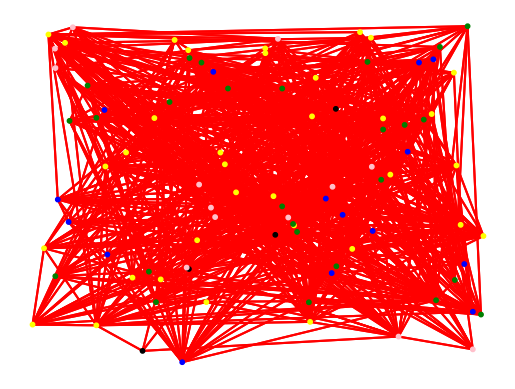

In [5]:
pp.plot(office_graph.to_static_graph(), backend='matplotlib' ,**style)

Wenn delta zu klein gibts fehler?

In [6]:
layout_2 =  HotVis(office_graph, 2, 50000, 200, alpha=[1, 0.5], force=10)
layout_3 =  HotVis(office_graph, 3, 50000, 200, alpha=[1, 0.5, 0.3], force=10)
layout_5 =  HotVis(office_graph, 5, 50000, 200, alpha=[1, 0.5, 0.3, 0.25, 0.2], force=10)


100%|██████████| 50000/50000 [00:10<00:00, 4726.87it/s]


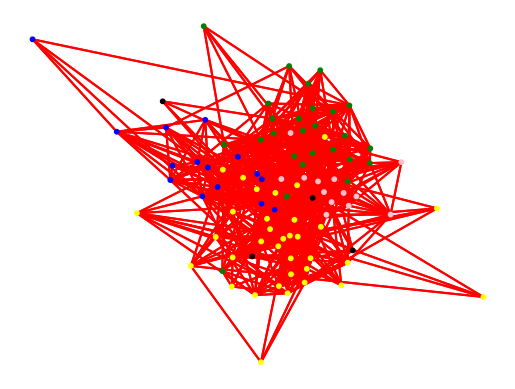

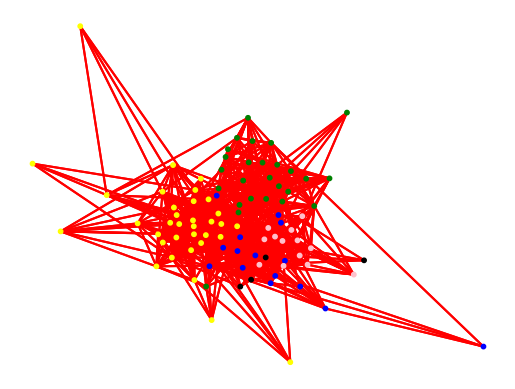

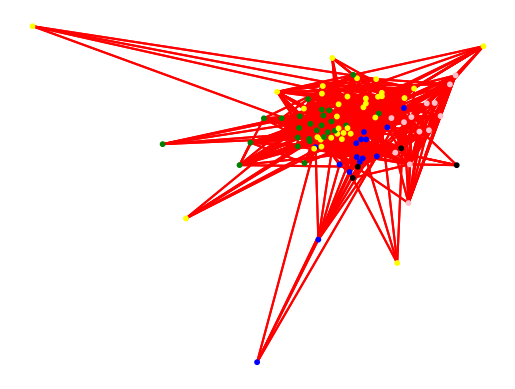

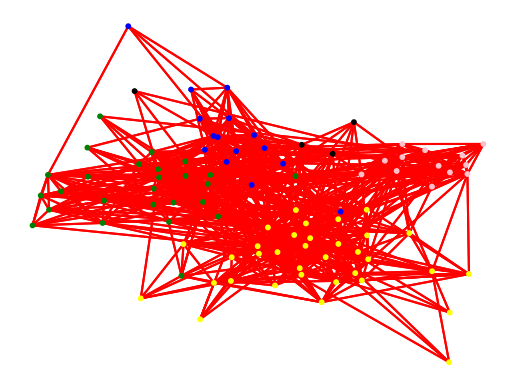

In [7]:
pp.plot(office_graph.to_static_graph(), layout=layout_2, backend='matplotlib' ,**style)
pp.plot(office_graph.to_static_graph(), layout=layout_3, backend='matplotlib' ,**style)
pp.plot(office_graph.to_static_graph(), layout=layout_5, backend='matplotlib' ,**style)
pp.plot(office_graph.to_static_graph(), layout="fr", backend='matplotlib' ,**style)